In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

columns_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv',names=columns_names,delim_whitespace=True,)

dataSelected = data.loc[:, ['RM', 'LSTAT']]
dataOutput = data.loc[:, ['MEDV']]

In [3]:
def hypothesis(x, theta):
    """
      x is training set
      theta is weight parameter
      """
    return np.transpose(np.array(theta)).dot(np.array(x))

def costFunction(theta, x, y):
    """
        x is training set
        y is a vector of
        theta is weight parameter
        """
    factor = 1 / 2 * len(x)
    sum = 0
    for i in range(0, len(x)):
        sum += math.pow((hypothesis(x[i], theta) - y[i]), 2)
    return factor * sum

def learnThetaSingle(theta, x, y, alpha):
    return theta + alpha * (y - hypothesis(x, theta)) * x

def learnTheta(theta, x, y, alpha):
    f = theta
    for i in range(0, len(x)):
        f = learnThetaSingle(f, x[i], y[i], alpha)
    return f


In [4]:
testX = np.array(dataSelected)
testY = np.array(dataOutput)

initial_theta = [5, -0.5]
cost = costFunction(initial_theta, testX, testY)
print(cost)
theta = learnTheta(initial_theta, testX, testY, 0.0005)
cost = costFunction(theta, testX, testY)

print(theta)
print(cost)

4890864.098450001
[ 4.78303406 -0.71967179]
4251528.174218933


RM


LSTAT


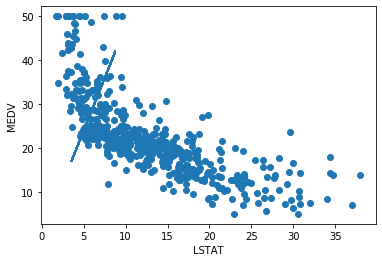

In [12]:
y_pred = theta*testX
# print(testX[:, 0], y_pred[:, 0])

for column in dataSelected.columns:
    print(column)
    plt.scatter(x=dataSelected.loc[:, column], y=dataOutput)
    plt.xlabel(column)
    plt.ylabel(dataOutput.columns[0])
    plt.plot(testX[:, 0], y_pred[:, 0], antialiased=False)
    plt.show()
